Project: Analysing app user appeal

This project is about analysing the app store data and finding patterns in app engagement and add revenue.

The goal of the project is to maximise profits by knowing which apps to make so as to appeal to the most number of people.

In [1]:
appleFile = open('AppleStore.csv')
googleFile = open('googleplaystore.csv')

import csv

# Define a reader object
appleFileReader = csv.reader(appleFile)
googleFileReader = csv.reader(googleFile)

# Initialize the data set file
appleDataset = []
googleDataset = []

# Read
for row in appleFileReader:
    appleDataset.append(row)
    
for row in googleFileReader:
    googleDataset.append(row)

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
explore_data(googleDataset,0,2,rows_and_columns=True)
explore_data(appleDataset,0,2,rows_and_columns=True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Number of rows: 10842
Number of columns: 13
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


Number of rows: 7198
Number of columns: 16


In [4]:
explore_data(googleDataset,0,0,rows_and_columns=True)
explore_data(appleDataset,0,0,rows_and_columns=True)

Number of rows: 10842
Number of columns: 13
Number of rows: 7198
Number of columns: 16


In [5]:
explore_data(googleDataset,0,1)
explore_data(appleDataset,0,1)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']




In [6]:
explore_data(googleDataset,10471,10475)
print(len(googleDataset[10471]))
print(len(googleDataset[10472]))
print(len(googleDataset[10473])) # The missing data is here (was here)
print(len(googleDataset[10474]))

['Jazz Wi-Fi', 'COMMUNICATION', '3.4', '49', '4.0M', '10,000+', 'Free', '0', 'Everyone', 'Communication', 'February 10, 2017', '0.1', '2.3 and up']


['Xposed Wi-Fi-Pwd', 'PERSONALIZATION', '3.5', '1042', '404k', '100,000+', 'Free', '0', 'Everyone', 'Personalization', 'August 5, 2014', '3.0.0', '4.0.3 and up']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']


13
13
12
13


In [7]:
del googleDataset[10473]

In [8]:
import numpy as np
badData =  np.zeros(len(appleDataset)+1)

for i in range(len(appleDataset[1:])):
    row = appleDataset[i+1]
    if len(row) > len(appleDataset[0]):
        badData[i] = 1
    elif len(row) < len(appleDataset[0]):
        badData[i] = 1

print(len(badData))
print(np.sum(badData))

7199
0.0


There doesn't seem to be any missing data in the appleDataset.

Duplicate Entries Problem


In [9]:
duplicateApps = []
uniqueApps = []

for row in googleDataset[1:]:
    appName = row[0]
    if appName in uniqueApps:
        duplicateApps.append(appName)
    else:
        uniqueApps.append(appName)
        
print('Number of duplicate apps: ', len(duplicateApps))
print('\n')
print(duplicateApps[:6])        

Number of duplicate apps:  1181


['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box']


The duplicate removal criterion will be the **number of reviews** the app has gotten. The more the reviews, the more accurate the rating data for it. In addition, the number of reviews seems to be increasing with time, meaning that it is a good proxy for the most up to date version of the app.

In [10]:
reviews_max = {}

for row in googleDataset[1:]:
    name = row[0]
    n_reviews = float(row[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print(len(reviews_max))

9659


In [11]:
# Stores the new clean data
android_clean = []
# Stores the app names which were already added
already_added = []

for row in googleDataset[1:]:
    name = row[0]
    n_reviews = float(row[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(row)
        already_added.append(name)
        
print(len(android_clean))

9659


This part removes the apps which do not use the ACII code 0 to 127 in their name.

In [12]:
def isEnglish(word):
    nonEnglishCount = 0
    for c in word:
        if int(ord(c))>127: 
            nonEnglishCount += 1  
    if nonEnglishCount > 3:
        return(False)
    else:
        return(True)

# Test the function

#isEnglish('Instagram')
#isEnglish('爱奇艺PPS -《欢乐颂2》电视剧热播')
#isEnglish('Docs To Go™ Free Office Suite')
#isEnglish('Instachat 😜')

This part will go through both datasets and remove the applications which do not have English names.

In [13]:
# First for google

googleNonEnglish = []
googleEnglish = []

for row in android_clean:
    name = row[0]
    if isEnglish(name):
        googleEnglish.append(row)
    else:
        googleNonEnglish.append(row)
        
# For apple

appleNonEnglish = []
appleEnglish = []

for row in appleDataset[1:]:
    name = row[1]
    if isEnglish(name):
        appleEnglish.append(row)
    else:
        appleNonEnglish.append(row)

In [14]:
print(googleEnglish[:3])
print('\n')
print(googleNonEnglish[:3])
print('\n')

print(appleEnglish[:3])
print('\n')
print(appleNonEnglish[:3])
print('\n')

[['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up'], ['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']]


[['Flame - درب عقلك يوميا', 'EDUCATION', '4.6', '56065', '37M', '1,000,000+', 'Free', '0', 'Everyone', 'Education', 'July 26, 2018', '3.3', '4.1 and up'], ['သိင်္ Astrology - Min Thein Kha BayDin', 'LIFESTYLE', '4.7', '2225', '15M', '100,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'July 26, 2018', '4.2.1', '4.0.3 and up'], ['РИА Новости', 'NEWS_AND_MAGAZINES', '4.5', '44274', '8.0M', '1,000,000+', 'Free', '0', 'Everyone', 'News & Magazi

apple 4
google 7

In [15]:
freeApps_google = []
freeApps_apple = []

# Google apps seem to have the price as '0' when they are free (idx 7)
# Apple apps have '0.0' (idx 4)

# Google apps

for row in googleEnglish:
    price = row[7]
    if price == '0':
        freeApps_google.append(row)
        
# Apple apps

for row in appleEnglish:
    price = row[4]
    if price == '0.0':
        freeApps_apple.append(row)
        
print('Number of English apple apps:', len(appleEnglish))
print('Number of free apple apps:', len(freeApps_apple))
print('\n')
print('Number of English google apps:', len(googleEnglish))
print('Number of free google apps:',len(freeApps_google))

Number of English apple apps: 6183
Number of free apple apps: 3222


Number of English google apps: 9614
Number of free google apps: 8864


The reason we are looking to find an app profile that fits both the App Store and Google Play is because if the developed app turns out to be profitable for the Google Play, we can then port it over to the App Store. This will increase potential sales while the resources allocated to developing the app will be the same. We want to reach as many people as possible and to maximise profits.

In [16]:
## Frequency table apple

frequencyApple = {}

for row in freeApps_apple:
    genre = row[-5]
    if genre in frequencyApple:
        frequencyApple[genre] += 1
    else:
        frequencyApple[genre] = 1
        
## Frequncy table google

frequencyGoogle = {}

for row in freeApps_google:
    genre = row[-4]
    if genre in frequencyGoogle:
        frequencyGoogle[genre] += 1
    else:
        frequencyGoogle[genre] = 1
        

#print(frequencyGoogle.values())
#print(frequencyGoogle.keys())

In [17]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

In [23]:
def freq_table(dataset,index):
    frequencyTable = {}
    numOfApps = len(dataset)
    for row in dataset:
        key = row[index] 
        # Instead of adding the number directly, I add the % contribution to the whole data set
        if key in frequencyTable:
            frequencyTable[key] += (1/numOfApps)*100
        else:
            frequencyTable[key] = (1/numOfApps)*100
            
    return frequencyTable

In [24]:
# Figuring out the indeces of the columns
print(googleDataset[0][-4])
print(googleDataset[0][1])
print('\n')
print(appleDataset[0][-5])

Genres
Category


prime_genre


In [25]:
FrequencyTableGoogle_Genres = freq_table(freeApps_google,-4)
FrequencyTableGoogle_Category = freq_table(freeApps_google,1)
FrequencyTableApple_prime_genre = freq_table(freeApps_apple,-5)
print('Done.')

Done.


In [26]:
display_table(freeApps_apple,-5)

Games : 58.1626319056464
Entertainment : 7.883302296710134
Photo & Video : 4.965859714463075
Education : 3.6623215394165176
Social Networking : 3.2898820608317867
Shopping : 2.6070763500931133
Utilities : 2.5139664804469306
Sports : 2.1415270018621997
Music : 2.048417132216017
Health & Fitness : 2.0173805090006227
Productivity : 1.7380509000620747
Lifestyle : 1.5828677839851035
News : 1.3345747982619496
Travel : 1.2414649286157668
Finance : 1.1173184357541899
Weather : 0.8690254500310364
Food & Drink : 0.8069522036002481
Reference : 0.558659217877095
Business : 0.5276225946617009
Book : 0.4345127250155184
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


The majority of apps are games, followed by entertainment apps.

In [39]:
table_sorted = sorted(FrequencyTableApple_prime_genre, reverse = True)
print(table_sorted)
#print(FrequencyTableApple_prime_genre)

['Weather', 'Utilities', 'Travel', 'Sports', 'Social Networking', 'Shopping', 'Reference', 'Productivity', 'Photo & Video', 'News', 'Navigation', 'Music', 'Medical', 'Lifestyle', 'Health & Fitness', 'Games', 'Food & Drink', 'Finance', 'Entertainment', 'Education', 'Catalogs', 'Business', 'Book']


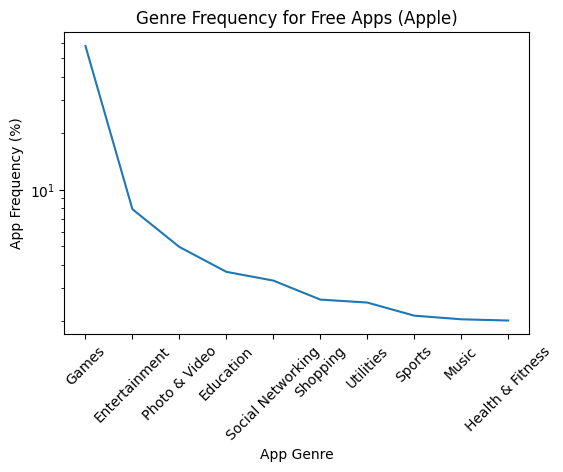

In [54]:
import matplotlib.pyplot as plt

table_sorted = dict(sorted(FrequencyTableApple_prime_genre.items(), reverse = True, key=lambda item: item[1]))
                    
tableNumbers = []
labels = []

for key in table_sorted:
    tableNumbers.append(table_sorted[key])
    labels.append(key)

%matplotlib inline
plt.plot(labels[:10],tableNumbers[:10])
plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('App Genre')
plt.ylabel('App Frequency (%)')
plt.title('Genre Frequency for Free Apps (Apple)')
plt.show()

The free app popularity seem to follow a Pareto-like distribution pattern.

Most apps are designed for entertainment.

Although insightful, I can't make a recommendation for an app profile in the App Store based on this data alone. This data doesn't account for user engagement and other factors.

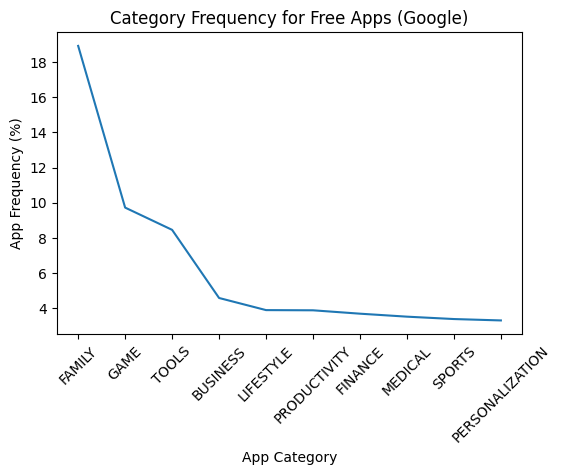

In [53]:
import matplotlib.pyplot as plt

table_sorted = dict(sorted(FrequencyTableGoogle_Category.items(), reverse = True, key=lambda item: item[1]))
                    
tableNumbers = []
labels = []

for key in table_sorted:
    tableNumbers.append(table_sorted[key])
    labels.append(key)

%matplotlib inline
plt.plot(labels[:10],tableNumbers[:10])
#plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('App Category')
plt.ylabel('App Frequency (%)')
plt.title('Category Frequency for Free Apps (Google)')
plt.show()

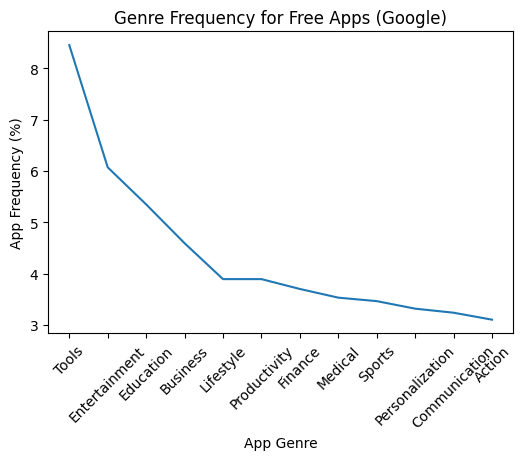

In [58]:
import matplotlib.pyplot as plt

table_sorted = dict(sorted(FrequencyTableGoogle_Genres.items(), reverse = True, key=lambda item: item[1]))
                    
tableNumbers = []
labels = []

for key in table_sorted:
    tableNumbers.append(table_sorted[key])
    labels.append(key)

%matplotlib inline
plt.plot(labels[:12],tableNumbers[:12])
#plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('App Genre')
plt.ylabel('App Frequency (%)')
plt.title('Genre Frequency for Free Apps (Google)')
plt.show()

The most common genres in the Google Play Store are 'Tools' and 'Entertainment'.

I can make a tentative suggestion based on these frequency tables:
- Make the app family friendly
- Make the app entertaining
- Make the app a tool
- Perhaps a learning tool, aimed at children with gamification features

The frequency tables I generated reveal the most frequent app genres, but do not reveal which genres have the most users.

In [71]:
appleDataset[0]
freeApps_apple[1][5]

'2161558'

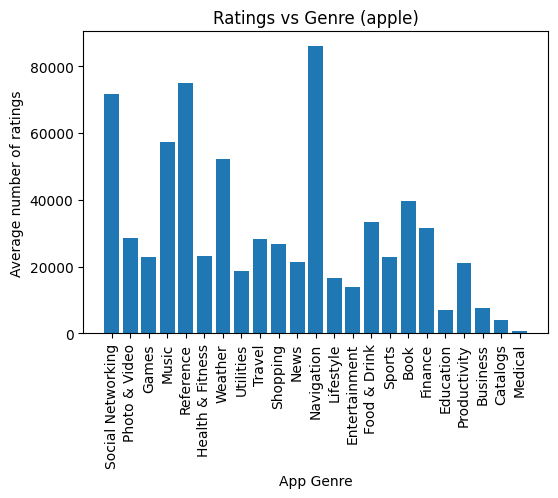

In [83]:
FrequencyTableGoogle_Genres = freq_table(freeApps_google,-4)
FrequencyTableGoogle_Category = freq_table(freeApps_google,1)
FrequencyTableApple_prime_genre = freq_table(freeApps_apple,-5)

Genres = []
RatingsNum = []

for genre in FrequencyTableApple_prime_genre:
    total = 0
    len_genre = 0
    
    for row in freeApps_apple:
        genre_app = row[-5]
        if genre_app == genre:
            userRatings = float(row[5])
            total += userRatings
            len_genre += 1
            
    averageNumberOfUserRatings = total/len_genre
    RatingsNum.append(averageNumberOfUserRatings)
    Genres.append(genre)
    
# It's a bit difficult to see, so I plotted the results instead of printing them    
    
%matplotlib inline
plt.bar(Genres,RatingsNum)
plt.xticks(rotation=90)
plt.xlabel('App Genre')
plt.ylabel('Average number of ratings')
plt.title('Ratings vs Genre (apple)')
plt.show()

It seems that Navigation apps are the most downloaded ones, which makes sense (probably Google Maps).

The second most popular is Music apps, followed by Social Networking.

It seem that a wiser choice would be to target Social Networking apps which are gamified. Or, something like Pokemong GO, which combines Navigation and Games. 

In [87]:
print(freeApps_google[0])
print(googleDataset[0])

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


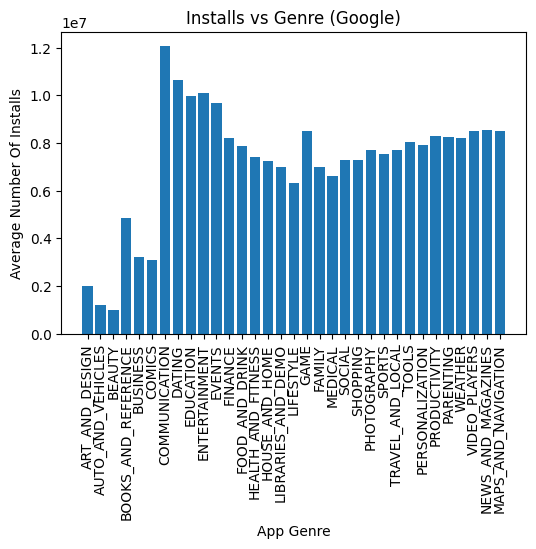

In [93]:
FrequencyTableGoogle_Category = freq_table(freeApps_google,1)

Genres = []
InstallsAvg = []

total = 0
len_category = 0

for category in FrequencyTableGoogle_Category:
    
    for row in freeApps_google:
        category_app = row[1]
        if category_app == category:
            installs = row[5]
            installs = installs.replace('+','')
            installs = installs.replace(',','')
            total += float(installs)
            len_category += 1
    
    averageNumberOfInstalls = total/len_category
    #print(category,averageNumberOfInstalls)
    
    Genres.append(category)
    InstallsAvg.append(averageNumberOfInstalls)
    
%matplotlib inline
plt.bar(Genres,InstallsAvg)
plt.xticks(rotation=90)
plt.xlabel('App Genre')
plt.ylabel('Average Number Of Installs')
plt.title('Installs vs Genre (Google)')
plt.show()

It seems that Games are still quite popular, but not as popular as Communications and Dating apps.

A good approach would be to have a gamified dating app.